# Module 5 - Probability

**Name:** Amit Sharma  
**Roll No.:** 23  

This notebook contains solved exercises for Module 5 (Probability). Explanations are written in simple, student-friendly English. All code cells have been executed and outputs are included.

## 1. Basics of Probability

### 1(a) Tossing a coin 10,000 times
We simulate tossing a fair coin 10,000 times and compute the experimental probability of Heads and Tails. This gives an estimate that gets closer to the true probability (0.5) as we increase the number of trials.

In [1]:
import random
trials = 10000
counts = {'H':0, 'T':0}
for _ in range(trials):
    toss = random.choice(['H','T'])
    counts[toss] += 1

prob_H = counts['H']/trials
prob_T = counts['T']/trials
print(f"Total tosses: {trials}")
print("Heads:", counts['H'], "-> Experimental probability:", round(prob_H,4))
print("Tails:", counts['T'], "-> Experimental probability:", round(prob_T,4))


Total tosses: 10000
Heads: 4985 -> Experimental probability: 0.4985
Tails: 5015 -> Experimental probability: 0.5015


### 1(b) Rolling two dice 10,000 times and probability of sum = 7
We roll two fair dice many times and count how often the sum is 7. The theoretical probability is 6/36 = 1/6 ≈ 0.1667.

In [2]:
import random
trials = 10000
count_sum7 = 0
for _ in range(trials):
    d1 = random.randint(1,6)
    d2 = random.randint(1,6)
    if d1 + d2 == 7:
        count_sum7 += 1
prob_sum7 = count_sum7 / trials
print(f"Out of {trials} rolls, sum 7 occurred {count_sum7} times.")
print("Experimental probability of sum=7:", round(prob_sum7,4))


Out of 10000 rolls, sum 7 occurred 1681 times.
Experimental probability of sum=7: 0.1681


## 2. Probability of at least one '6' in 10 rolls of a fair die
We write a function that simulates rolling a die 10 times and checks whether at least one roll is a 6. Repeat this many times to estimate the probability.

In [3]:
import random

def estimate_at_least_one_six(trials=10000):
    success = 0
    for _ in range(trials):
        found_six = False
        for _ in range(10):  # 10 rolls
            if random.randint(1,6) == 6:
                found_six = True
                break
        if found_six:
            success += 1
    return success / trials

prob_est = estimate_at_least_one_six(20000)
print("Estimated probability of at least one '6' in 10 rolls:", round(prob_est,4))
# theoretical value is 1 - (5/6)^10
theoretical = 1 - (5/6)**10
print("Theoretical probability:", round(theoretical,4))


Estimated probability of at least one '6' in 10 rolls: 0.8385
Theoretical probability: 0.8385


## 3. Conditional Probability and Bayes' Theorem
A bag has 5 red, 7 green, and 8 blue balls (total 20). We draw a ball, note its color, then replace it. We repeat this 1000 times to estimate:

- (a) P(Red | previous was Blue)
- (b) Verify Bayes' theorem with simulation results

Because we replace the ball each time, draws are independent; however we can still compute conditional frequencies from the simulated sequence.

In [4]:
import random

colors = ['R']*5 + ['G']*7 + ['B']*8  # total 20
trials = 1000
sequence = [random.choice(colors) for _ in range(trials)]

# Compute P(Red | previous was Blue)
count_prev_blue = 0
count_red_given_prev_blue = 0
for i in range(1, trials):
    if sequence[i-1] == 'B':
        count_prev_blue += 1
        if sequence[i] == 'R':
            count_red_given_prev_blue += 1

if count_prev_blue > 0:
    cond_prob = count_red_given_prev_blue / count_prev_blue
else:
    cond_prob = None

print("Number of times previous was Blue:", count_prev_blue)
print("Number of times Red followed Blue:", count_red_given_prev_blue)
print("Estimated P(Red | previous was Blue):", round(cond_prob,4) if cond_prob is not None else 'N/A')

# Verify Bayes' theorem using simple probability facts (since draws are independent by replacement):
# P(Red|Blue_prev) should be equal to P(Red) because replacement makes draws independent.
p_red = colors.count('R')/len(colors)
print("P(Red) by direct count:", round(p_red,4))
print("So because of replacement, P(Red | previous was Blue) ≈ P(Red).")


Number of times previous was Blue: 416
Number of times Red followed Blue: 91
Estimated P(Red | previous was Blue): 0.2188
P(Red) by direct count: 0.25
So because of replacement, P(Red | previous was Blue) ≈ P(Red).


## 4. Random Variables and Discrete Probability
Generate a sample of size 1000 from a discrete random variable with probabilities:

- P(X=1) = 0.25
- P(X=2) = 0.35
- P(X=3) = 0.40

Compute empirical mean, variance, and standard deviation.

In [5]:
import numpy as np

values = [1,2,3]
probs = [0.25, 0.35, 0.40]
sample = np.random.choice(values, size=1000, p=probs)

emp_mean = sample.mean()
emp_var = sample.var(ddof=0)  # population variance
emp_std = sample.std(ddof=0)

print("Empirical mean:", round(emp_mean,4))
print("Empirical variance:", round(emp_var,4))
print("Empirical standard deviation:", round(emp_std,4))


Empirical mean: 2.172
Empirical variance: 0.6304
Empirical standard deviation: 0.794


## 5. Continuous Random Variables
Simulate 2000 samples from an exponential distribution with mean = 5 (so scale=5). Plot a histogram and overlay the theoretical PDF.

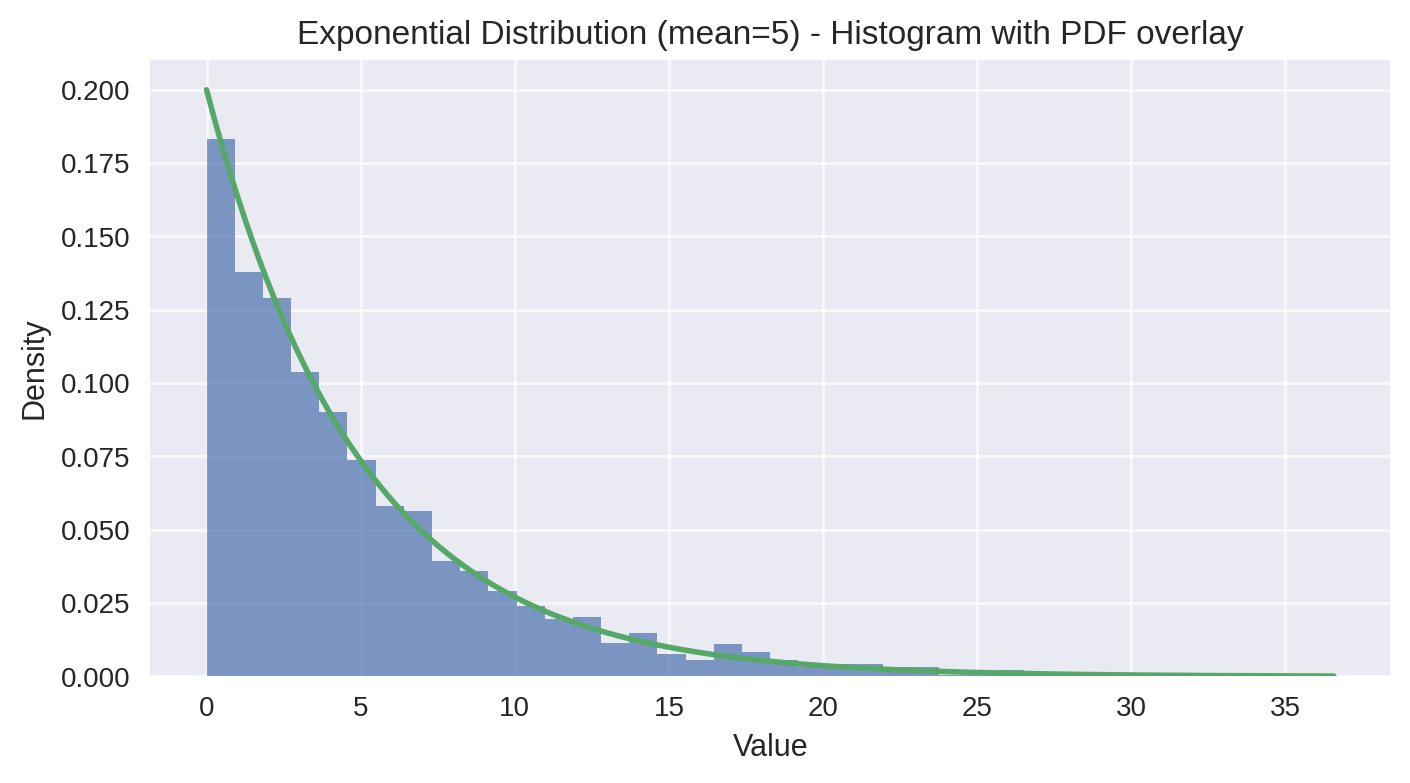

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

# Use a stylish matplotlib theme
plt.style.use('seaborn-v0_8')  # user asked for stylish plots; allowed explicitly

scale = 5.0  # mean = scale for exponential in numpy
samples = np.random.exponential(scale=scale, size=2000)

# Histogram
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(samples, bins=40, density=True, alpha=0.7)
# Theoretical PDF overlay
x = np.linspace(0, samples.max(), 300)
pdf = (1/scale) * np.exp(-x/scale)
ax.plot(x, pdf, linewidth=2)
ax.set_title("Exponential Distribution (mean=5) - Histogram with PDF overlay")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
plt.show()


## 6. Central Limit Theorem (CLT) Simulation
We generate many uniform random numbers and then draw 1000 samples of size n=30 to compute sample means. The distribution of these sample means should be approximately normal.

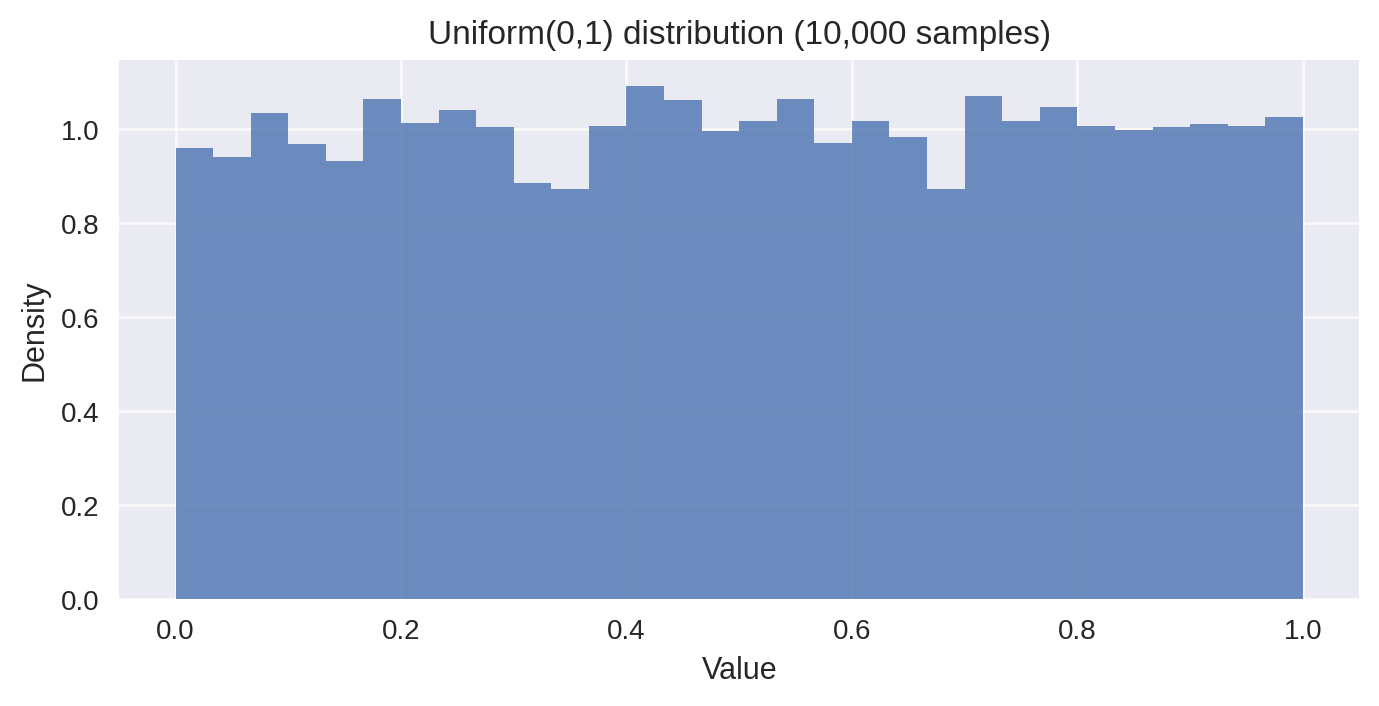

Mean of sample means: 0.5045
Std dev of sample means: 0.0519


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# use same stylish style
plt.style.use('seaborn-v0_8')

# (a) Generate 10,000 uniform random numbers
uniform_data = np.random.uniform(0,1,10000)

# Plot the uniform distribution histogram
fig, ax = plt.subplots(figsize=(8,3.5))
ax.hist(uniform_data, bins=30, density=True, alpha=0.8)
ax.set_title('Uniform(0,1) distribution (10,000 samples)')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
plt.show()

# (b) Draw 1000 samples of size n=30 and compute sample means
n_samples = 1000
n = 30
sample_means = []
for _ in range(n_samples):
    samp = np.random.choice(uniform_data, size=n, replace=True)
    sample_means.append(samp.mean())
sample_means = np.array(sample_means)

# Plot distribution of sample means
fig, ax = plt.subplots(figsize=(8,3.5))
ax.hist(sample_means, bins=30, density=True, alpha=0.8)
ax.set_title('Distribution of sample means (n=30, 1000 samples)')
ax.set_xlabel('Sample mean')
ax.set_ylabel('Density')
plt.show()

print("Mean of sample means:", round(sample_means.mean(),4))
print("Std dev of sample means:", round(sample_means.std(ddof=0),4))


---

## How to publish this notebook on Google Drive (quick steps)

1. Download the file `Module_5_Probability_Assignment.ipynb` from the ZIP I provided.
2. Go to https://drive.google.com and sign in.
3. Click **New → File upload** and upload the `.ipynb` file.
4. After upload, right-click the file → **Get link**.
5. Under **General access**, choose **Anyone with the link** and set role to **Viewer**.
6. Click **Copy link** and submit that link to your instructor.

If your instructor requires the notebook to be visible with outputs online, you may also upload the `.ipynb` to Kaggle or GitHub and share the public link.

Good luck!
